## Вариант 2. 
- реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.  
- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.  
- оценить рост точности при увеличении глубины сети (больше слоев)  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


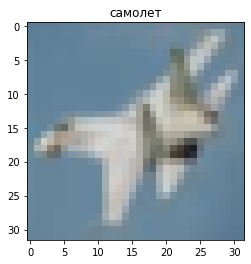

In [4]:
N = 10
plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [5]:
score = pd.DataFrame(columns=['Модель', 'Train', 'Test', 'loss', 'accuracy'])
batch_size = 512
epochs = 10

In [6]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [7]:
model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/10
98/98 [==============================] - 242s 2s/step - loss: 2.2989 - accuracy: 0.1089 - val_loss: 2.2806 - val_accuracy: 0.1527
Epoch 2/10
98/98 [==============================] - 189s 2s/step - loss: 2.2689 - accuracy: 0.1542 - val_loss: 2.2048 - val_accuracy: 0.1890
Epoch 3/10
98/98 [==============================] - 158s 2s/step - loss: 2.1591 - accuracy: 0.2306 - val_loss: 2.1312 - val_accuracy: 0.2250
Epoch 4/10
98/98 [==============================] - 173s 2s/step - loss: 2.0509 - accuracy: 0.2638 - val_loss: 1.9648 - val_accuracy: 0.2983
Epoch 5/10
98/98 [==============================] - 145s 1s/step - loss: 1.9713 - accuracy: 0.2988 - val_loss: 1.9174 - val_accuracy: 0.3150
Epoch 6/10
98/98 [==============================] - 132s 1s/step - loss: 1.9286 - accuracy: 0.3195 - val_loss: 1.8828 - val_accuracy: 0.3222
Epoch 7/10
98/98 [==============================] - 133s 1s/step - loss: 1.8754 - accuracy: 0.3378 - val_loss: 1.8936 - val_accuracy: 0.3389
Epoch 8/10
98

In [8]:
# проверка работы обученной модели
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_p = model.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )

new_row = {'Модель':'CNN базовая', 'Train':classes[y_t[0]], 'Test': classes[y_i[0]], \
           'loss':round(scores[0], 4), 'accuracy':round(scores[1], 4)}

score = score.append(new_row, ignore_index=True)

313/313 [==============================] - 7s 22ms/step - loss: 1.7268 - accuracy: 0.3839
Test loss: 1.7267812490463257
Test accuracy: 0.383899986743927


- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.

In [9]:
# конфигурирование слоев нейросети
model1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# полносвязные слои нейронной сети
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()
# компиляция модели
model1.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       36992     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [10]:
model1.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/10
98/98 [==============================] - 239s 2s/step - loss: 2.3040 - accuracy: 0.1089 - val_loss: 2.2875 - val_accuracy: 0.1409
Epoch 2/10
98/98 [==============================] - 247s 3s/step - loss: 2.2802 - accuracy: 0.1457 - val_loss: 2.2434 - val_accuracy: 0.2060
Epoch 3/10
98/98 [==============================] - 230s 2s/step - loss: 2.2120 - accuracy: 0.2253 - val_loss: 2.0781 - val_accuracy: 0.2531
Epoch 4/10
98/98 [==============================] - 251s 3s/step - loss: 2.0903 - accuracy: 0.2500 - val_loss: 1.9692 - val_accuracy: 0.2908
Epoch 5/10
98/98 [==============================] - 245s 3s/step - loss: 1.9858 - accuracy: 0.2895 - val_loss: 1.9584 - val_accuracy: 0.2994
Epoch 6/10
98/98 [==============================] - 255s 3s/step - loss: 1.9534 - accuracy: 0.3013 - val_loss: 1.8743 - val_accuracy: 0.3413
Epoch 7/10
98/98 [==============================] - 258s 3s/step - loss: 1.8897 - accuracy: 0.3267 - val_loss: 1.8371 - val_accuracy: 0.3388
Epoch 8/10
98

In [11]:
# проверка работы обученной модели
scores = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_p = model1.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
new_row = {'Модель':'CNN c увеличением каналов', 'Train':classes[y_t[0]], 'Test': classes[y_i[0]], \
           'loss':round(scores[0], 4), 'accuracy':round(scores[1], 4)}
score = score.append(new_row, ignore_index=True)

313/313 [==============================] - 17s 54ms/step - loss: 1.7358 - accuracy: 0.3820
Test loss: 1.735841989517212
Test accuracy: 0.38199999928474426


- оценить рост точности при увеличении глубины сети (больше слоев)

In [12]:
# конфигурирование слоев нейросети
model2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# полносвязные слои нейронной сети
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()
# компиляция модели
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 128)        

In [13]:
model2.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/10
98/98 [==============================] - 158s 2s/step - loss: 2.3028 - accuracy: 0.1293 - val_loss: 2.3010 - val_accuracy: 0.1611
Epoch 2/10
98/98 [==============================] - 161s 2s/step - loss: 2.3004 - accuracy: 0.1706 - val_loss: 2.2985 - val_accuracy: 0.1901
Epoch 3/10
98/98 [==============================] - 149s 2s/step - loss: 2.2977 - accuracy: 0.1874 - val_loss: 2.2946 - val_accuracy: 0.1987
Epoch 4/10
98/98 [==============================] - 150s 2s/step - loss: 2.2929 - accuracy: 0.1896 - val_loss: 2.2862 - val_accuracy: 0.1906
Epoch 5/10
98/98 [==============================] - 150s 2s/step - loss: 2.2818 - accuracy: 0.1873 - val_loss: 2.2625 - val_accuracy: 0.1937
Epoch 6/10
98/98 [==============================] - 186s 2s/step - loss: 2.2495 - accuracy: 0.1882 - val_loss: 2.1798 - val_accuracy: 0.1983
Epoch 7/10
98/98 [==============================] - 177s 2s/step - loss: 2.1634 - accuracy: 0.2071 - val_loss: 2.1635 - val_accuracy: 0.1956
Epoch 8/10
98

In [14]:
# проверка работы обученной модели
scores = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_p = model2.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
new_row = {'Модель':'CNN c увеличением слоев', 'Train':classes[y_t[0]], 'Test': classes[y_i[0]], \
           'loss':round(scores[0], 4), 'accuracy':round(scores[1], 4)}
score = score.append(new_row, ignore_index=True)

313/313 [==============================] - 8s 26ms/step - loss: 1.9613 - accuracy: 0.2900
Test loss: 1.9613115787506104
Test accuracy: 0.28999999165534973


- сравнить с точностью полносвязной сети для этой выборки

In [15]:
inputs = Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x_1 = Dense(512, activation='relu')(x)
x_2 = Dense(256, activation='relu')(x_1)
x_3 = Dense(128, activation='relu')(x_2)
x_4 = Dense(32, activation='relu')(x_3)
outputs = Dense(10)(x_4)
    
model3 = Model(inputs, outputs)
model3.summary()

model3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330   

In [16]:
model3.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/10
98/98 [==============================] - 13s 107ms/step - loss: 7.9303 - accuracy: 0.1017 - val_loss: 8.9294 - val_accuracy: 0.1000
Epoch 2/10
98/98 [==============================] - 8s 80ms/step - loss: 8.8673 - accuracy: 0.1000 - val_loss: 9.1390 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 6s 65ms/step - loss: 9.1118 - accuracy: 0.0979 - val_loss: 9.2131 - val_accuracy: 0.1000
Epoch 4/10
98/98 [==============================] - 9s 93ms/step - loss: 9.2861 - accuracy: 0.0984 - val_loss: 9.3001 - val_accuracy: 0.1000
Epoch 5/10
98/98 [==============================] - 6s 65ms/step - loss: 9.2691 - accuracy: 0.0991 - val_loss: 9.3001 - val_accuracy: 0.1000
Epoch 6/10
98/98 [==============================] - 6s 66ms/step - loss: 9.2725 - accuracy: 0.1008 - val_loss: 9.3001 - val_accuracy: 0.1000
Epoch 7/10
98/98 [==============================] - 6s 65ms/step - loss: 9.3552 - accuracy: 0.1010 - val_loss: 9.3001 - val_accuracy: 0.1000
Epoch 8/10


In [17]:
# проверка работы обученной модели
scores = model3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_p = model3.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )

new_row = {'Модель':'Полносвязная', 'Train':classes[y_t[0]], 'Test': classes[y_i[0]], \
           'loss':round(scores[0], 4), 'accuracy':round(scores[1], 4)}
score = score.append(new_row, ignore_index=True)

313/313 [==============================] - 1s 4ms/step - loss: 9.3001 - accuracy: 0.1000
Test loss: 9.300135612487793
Test accuracy: 0.10000000149011612


In [18]:
score

,Модель,Train,Test,loss,accuracy
0,CNN базовая,самолет,корабль,1.7268,0.3839
1,CNN c увеличением каналов,самолет,корабль,1.7358,0.3820
2,CNN c увеличением слоев,самолет,самолет,1.9613,0.2900
3,Полносвязная,самолет,лягушка,9.3001,0.1000


### Вывод: - самый лучший результат у модели CNN с увеличением слоев.